sklearn中自带了一些数据集，比如iris数据集，Iris数据中data存储花瓣长宽（column0,1）和花萼长宽（column2,3）.
target存储花的分类，Iris-setosa , Iris-versicolor , and Iris-virginica ，分别存储为数字 0,1,2

## 收集训练样本

In [1]:
from sklearn import datasets
import numpy as np 

In [2]:
iris = datasets.load_iris()
X = iris.data[:,[2, 3]]
y = iris.target
print(np.unique(y))

[0 1 2]


## train_test_split将数据分为训练集和测试集
train_test_split 将数据集分为训练集和测试集，test_size参数决定测试集的比例。
random_state参数是随机数生成种子，在分类前将数据打乱，保证数据的可重复利用。
stratify 保证训练集和测试集中花的三大类的比例与输入比例相同。

In [3]:
from sklearn.model_selection import train_test_split
#train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1, stratify = y )
#bincount
print("Labels counts in y: ",np.bincount(y))
print("Labels counts in y_train: ", np.bincount(y_train))
print("Labels counts in y_test: ", np.bincount(y_test))

Labels counts in y:  [50 50 50]
Labels counts in y_train:  [35 35 35]
Labels counts in y_test:  [15 15 15]


## 特征标准化 Standardize the feature
运用sklearn preprocessing模块的StandardScaler类对特征值进行标准化。
fit ( )函数计算平均值和标准差，transform（）运用fit计算的mean和std deviation 进行数据的标准化。

In [4]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

## 训练感知机模型

In [5]:
from sklearn.linear_model import Perceptron
ppn = Perceptron(max_iter = 40, eta0 = 0.1, random_state = 1)
ppn.fit(X_train_std, y_train) 
y_pred = ppn.predict(X_test_std)
miss_classified = (y_pred != y_test).sum()
print("MissClassified: ",miss_classified)

MissClassified:  1


## 选择性能指标

In [6]:
from sklearn.metrics import accuracy_score
print('Accuracy : % .2f' % accuracy_score(y_pred, y_test))

Accuracy :  0.98


## 画分离超平面

In [7]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt 
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):     
    # setup marker generator and color map    
    markers = ('s', 'x', 'o', '^', 'v')    
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')    
    cmap = ListedColormap(colors[:len(np.unique(y))])     
    # plot the decision surface    
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1    
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1    
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))    
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)    
    Z = Z.reshape(xx1.shape)    
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)    
    plt.xlim(xx1.min(), xx1.max())    
    plt.ylim(xx2.min(), xx2.max())     
    for idx, cl in enumerate(np.unique(y)):        
        plt.scatter(x=X[y == cl, 0],  
                    y=X[y == cl, 1],  
                    alpha=0.8, 
                    c=colors[idx], 
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')     
    # highlight test samples    
    if test_idx:        
        # plot all samples        
        X_test, y_test = X[test_idx, :], y[test_idx]         
        plt.scatter(X_test[:, 0],                    
                    X_test[:, 1],                    
                    c='',                    
                    edgecolor='black',                    
                    alpha=1.0,                    
                    linewidth=1,                    
                    marker='o',                    
                    s=100,                     
                    label='test set')

<ipython-input-7-44c7c188430f>:29: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  plt.scatter(X_test[:, 0],


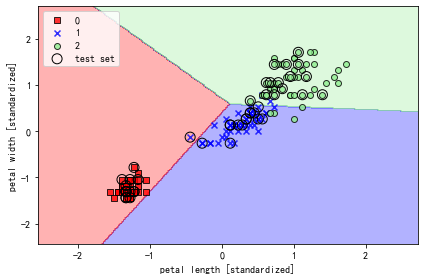

In [8]:
#htack vstack 水平叠加和垂直叠加
X_combined_std = np.vstack((X_train_std,X_test_std))
y_combined_std = np.hstack((y_train, y_test))
plot_decision_regions(X = X_combined_std,                       
                      y = y_combined_std,                       
                      classifier = ppn,                       
                      test_idx = range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc = 'upper left')
plt.tight_layout()
plt.show()